In [100]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

from src.models.network import Model
from src.models.training import *

In [101]:
input_features = "../data/processed/obesity_features.csv"
input_target = "../data/processed/obesity_target.csv"

X = np.genfromtxt(input_features, delimiter=',')
y = np.genfromtxt(input_target, delimiter=',')
X_train, X_test, y_train, y_test = data_split(X, y)

In [102]:
torch.manual_seed(42)
model = Model(X_train.shape[1], len(np.unique(y_train)), (24, 12), 'relu', 'softmax')
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=31, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=7, bias=True)
    (5): Softmax(dim=None)
  )
)

In [103]:
losses_train, losses_validate, accuracies = [], [], []
epochs = 300

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    loss_train = training_step(model, criterion, optimizer, X_train, y_train)
    losses_train.append(loss_train)
    loss_validate, accuracy = validation_step(model, criterion, X_test, y_test)
    losses_validate.append(loss_validate)
    accuracies.append(accuracy)

In [104]:
print(accuracies[-1])

0.8486997485160828


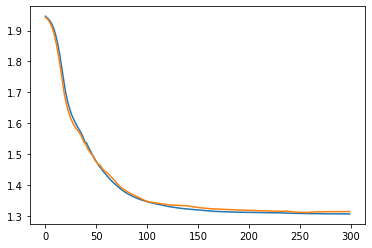

In [29]:
plt.plot(losses_train)
plt.plot(losses_validate)

# Adult

In [15]:
input_features = "../data/processed/adult_features.csv"
input_target = "../data/processed/adult_target.csv"

X = np.genfromtxt(input_features, delimiter=',')
y = np.genfromtxt(input_target, delimiter=',')
X_train, X_test, y_train, y_test = data_split(X, y)

In [16]:
torch.manual_seed(42)
model = Model(X_train.shape[1], len(np.unique(y_train)), (100, 240, 10), 'sigmoid', 'relu')
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=108, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=240, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=240, out_features=10, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=10, out_features=2, bias=True)
    (7): ReLU()
  )
)

In [17]:
losses_train, losses_validate, accuracies = [], [], []
epochs = 300

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    loss_train = training_step(model, criterion, optimizer, X_train, y_train)
    losses_train.append(loss_train)
    loss_validate, accuracy = validation_step(model, criterion, X_test, y_test)
    losses_validate.append(loss_validate)
    accuracies.append(accuracy)

In [18]:
print(accuracies[-1])

0.8604329824447632


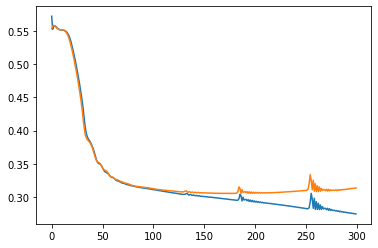

In [19]:
plt.plot(losses_train)
plt.plot(losses_validate)

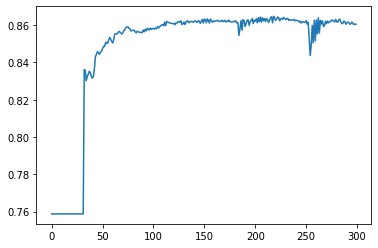

In [20]:
plt.plot(accuracies)

# TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from src.models.network import Model
from src.models.training import *

In [2]:
input_features = "../data/processed/anneal_features.csv"
input_target = "../data/processed/anneal_target.csv"

X = np.genfromtxt(input_features, delimiter=',')
y = np.genfromtxt(input_target, delimiter=',')
X_train, X_test, y_train, y_test = data_split(X, y)

In [4]:
X_train.shape

torch.Size([638, 26])

In [5]:
model = Model(X_train.shape[1], len(np.unique(y_train)), (52, 24), 'relu', 'softmax')
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=26, out_features=52, bias=True)
    (1): ReLU()
    (2): Linear(in_features=52, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=5, bias=True)
    (5): Softmax(dim=None)
  )
)

In [6]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 638
Labels: tensor([0, 1, 2, 3, 4])
Counts: tensor([  8,  70, 480,  50,  30])


In [7]:
max_val = torch.max(counts).item()
weights = max_val/counts
weights

tensor([60.0000,  6.8571,  1.0000,  9.6000, 16.0000])

In [8]:
losses_train, losses_validate, accuracies = [], [], []
epochs = 300

criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    loss_train = training_step(model, criterion, optimizer, X_train, y_train)
    losses_train.append(loss_train)
    loss_validate, accuracy = validation_step(model, criterion, X_test, y_test)
    losses_validate.append(loss_validate)
    accuracies.append(accuracy)

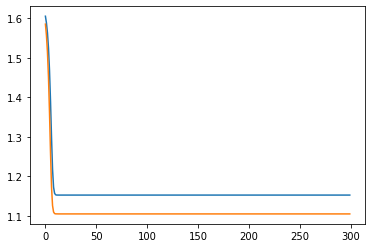

In [9]:
plt.plot(losses_train)
plt.plot(losses_validate)

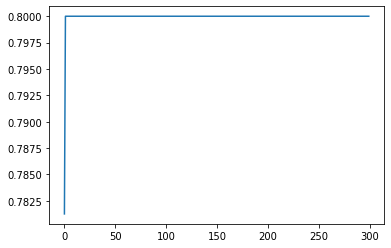

In [10]:
plt.plot(accuracies)

In [11]:
print(accuracies[-1])

0.800000011920929


In [12]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

1.10483122


In [73]:
ans = torch.argmax(y_val, dim=1)

In [74]:
acc = torch.sum(ans == y_test) / y_test.shape[0]

In [75]:
acc

tensor(0.3979)

In [139]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 1508
Labels: tensor([0, 1, 2, 3, 4, 5, 6])
Counts: tensor([ 27,  27,  52, 164, 219, 606, 413])


In [107]:
from src.data.utils import drugs
X,y = drugs("../data/raw/drugs.data")

In [113]:
X.isna().any()

Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
dtype: bool